# Data Exploration for Hindi BabyLM

This notebook provides comprehensive analysis of the Hindi training corpus:
- Corpus statistics
- Length distributions
- Character analysis
- Morphological complexity
- Data quality assessment

In [8]:
import sys
from pathlib import Path
import os

# Add project root to Python path for cluster
current = Path.cwd()
if current.name == 'workspace' or 'workspace' in str(current):
    project_root = current.parent / 'dss' / 'dsshome1' / '00' / 'ge95xod2' / 'Hindi-BabyLM-Data-Efficient-Language-Modeling-for-Hindi'
else:
    project_root = current.parent if current.name == 'notebooks' else current

sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Project imports
from src.data_processing.text_cleaner import clean_text
from src.data_processing.quality_filter import QualityFilter

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 1. Load Corpus Data

In [10]:
data_dir

'/dss/dsshome1/00/ge95xod2/Hindi-BabyLM-Data-Efficient-Language-Modeling-for-Hindi/data/splits'

In [11]:
# Load corpus files
data_dir = os.path.join(project_root,'data/splits')

# Load train/val/test splits
with open(os.path.join(data_dir, 'train.txt'), 'r', encoding='utf-8') as f:
    train_texts = f.readlines()

with open(os.path.join(data_dir, 'val.txt'), 'r', encoding='utf-8') as f:
    val_texts = f.readlines()

with open(os.path.join(data_dir, 'test.txt'), 'r', encoding='utf-8') as f:
    test_texts = f.readlines()

print(f"Training examples: {len(train_texts):,}")
print(f"Validation examples: {len(val_texts):,}")
print(f"Test examples: {len(test_texts):,}")
print(f"Total examples: {len(train_texts) + len(val_texts) + len(test_texts):,}")

Training examples: 200
Validation examples: 200
Test examples: 200
Total examples: 600


## 2. Basic Statistics

In [12]:
def compute_statistics(texts):
    """Compute corpus statistics"""
    stats = {}
    
    # Character counts
    all_text = ''.join(texts)
    stats['total_characters'] = len(all_text)
    
    # Word counts
    all_words = [word for text in texts for word in text.split()]
    stats['total_words'] = len(all_words)
    stats['unique_words'] = len(set(all_words))
    
    # Sentence lengths
    word_counts = [len(text.split()) for text in texts]
    stats['avg_sentence_length'] = np.mean(word_counts)
    stats['median_sentence_length'] = np.median(word_counts)
    stats['std_sentence_length'] = np.std(word_counts)
    
    # Character lengths
    char_counts = [len(text) for text in texts]
    stats['avg_char_length'] = np.mean(char_counts)
    
    return stats

train_stats = compute_statistics(train_texts)

print("📊 Corpus Statistics:")
print(f"  Total tokens: {train_stats['total_words']:,}")
print(f"  Unique tokens: {train_stats['unique_words']:,}")
print(f"  Type-Token Ratio: {train_stats['unique_words']/train_stats['total_words']:.4f}")
print(f"  Avg sentence length: {train_stats['avg_sentence_length']:.2f} words")
print(f"  Median sentence length: {train_stats['median_sentence_length']:.0f} words")

📊 Corpus Statistics:
  Total tokens: 4,001
  Unique tokens: 1,658
  Type-Token Ratio: 0.4144
  Avg sentence length: 20.00 words
  Median sentence length: 2 words


## 3. Length Distribution Analysis

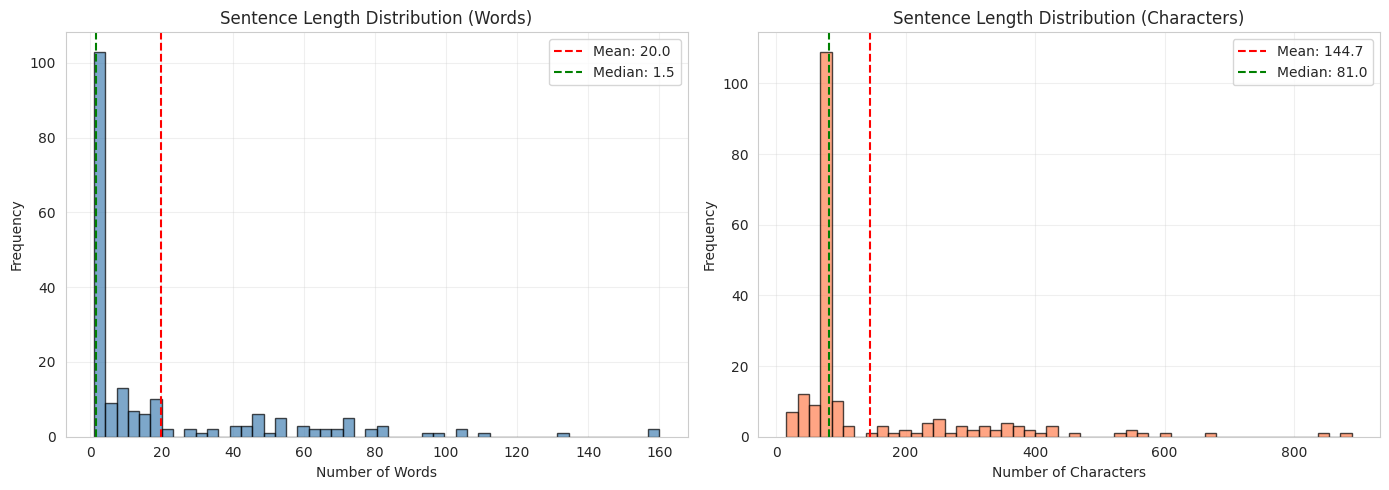

✅ Length distribution plot saved to figures/length_distributions.png


In [15]:
# Compute length distributions
train_word_counts = [len(text.split()) for text in train_texts]
train_char_counts = [len(text) for text in train_texts]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Word count distribution
ax1.hist(train_word_counts, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.mean(train_word_counts), color='red', linestyle='--', 
            label=f'Mean: {np.mean(train_word_counts):.1f}')
ax1.axvline(np.median(train_word_counts), color='green', linestyle='--',
            label=f'Median: {np.median(train_word_counts):.1f}')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Sentence Length Distribution (Words)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Character count distribution
ax2.hist(train_char_counts, bins=50, edgecolor='black', alpha=0.7, color='coral')
ax2.axvline(np.mean(train_char_counts), color='red', linestyle='--',
            label=f'Mean: {np.mean(train_char_counts):.1f}')
ax2.axvline(np.median(train_char_counts), color='green', linestyle='--',
            label=f'Median: {np.median(train_char_counts):.1f}')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')
ax2.set_title('Sentence Length Distribution (Characters)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(project_root,'figures/length_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Length distribution plot saved to figures/length_distributions.png")

## 4. Character Analysis

/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/3934667735.py:20: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  p

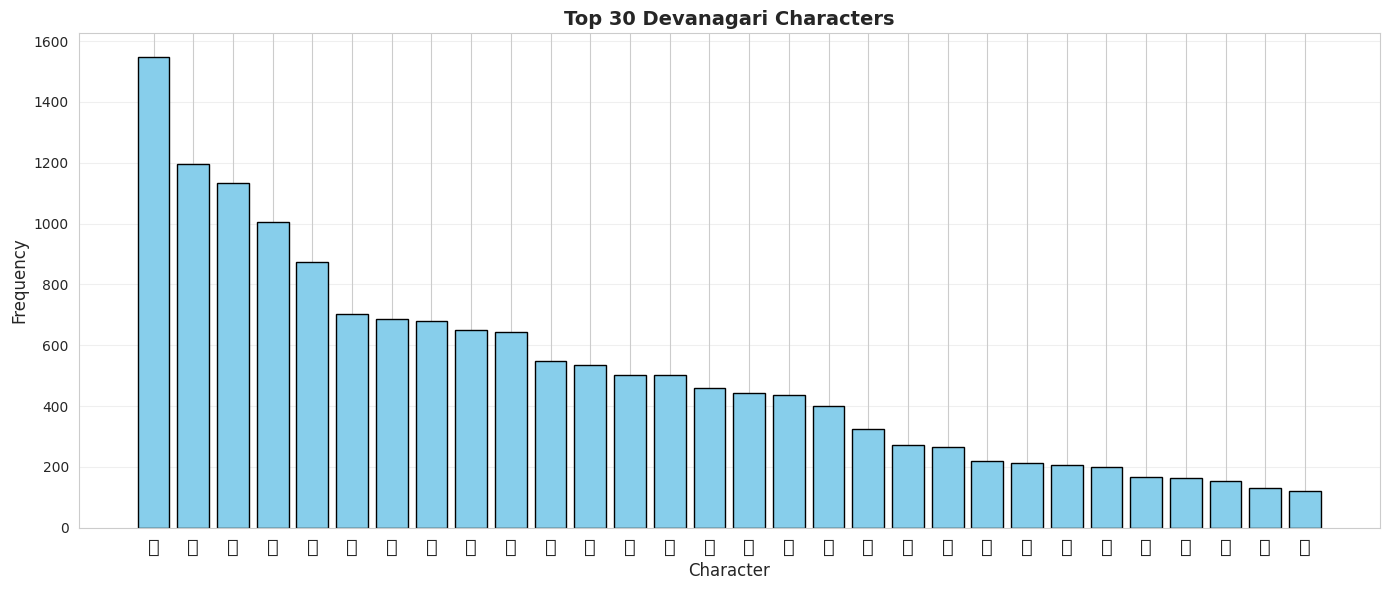


📊 Character Statistics:
  Total characters: 28,935
  Devanagari characters: 16,814
  Hindi ratio: 58.11%
  Unique Devanagari characters: 60


In [17]:
# Analyze character distribution
all_chars = ''.join(train_texts)
char_counter = Counter(all_chars)

# Devanagari range: U+0900 to U+097F
devanagari_chars = {char: count for char, count in char_counter.items()
                    if '\u0900' <= char <= '\u097F'}

# Top Devanagari characters
top_devanagari = sorted(devanagari_chars.items(), key=lambda x: x[1], reverse=True)[:30]
chars, counts = zip(*top_devanagari)

plt.figure(figsize=(14, 6))
plt.bar(range(len(chars)), counts, color='skyblue', edgecolor='black')
plt.xticks(range(len(chars)), chars, fontsize=14)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 30 Devanagari Characters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(project_root,'figures/character_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

# Statistics
total_chars = len(all_chars)
devanagari_count = sum(devanagari_chars.values())
hindi_ratio = devanagari_count / total_chars

print(f"\n📊 Character Statistics:")
print(f"  Total characters: {total_chars:,}")
print(f"  Devanagari characters: {devanagari_count:,}")
print(f"  Hindi ratio: {hindi_ratio:.2%}")
print(f"  Unique Devanagari characters: {len(devanagari_chars)}")

## 5. Word Frequency Analysis

/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/1036564010.py:15: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans

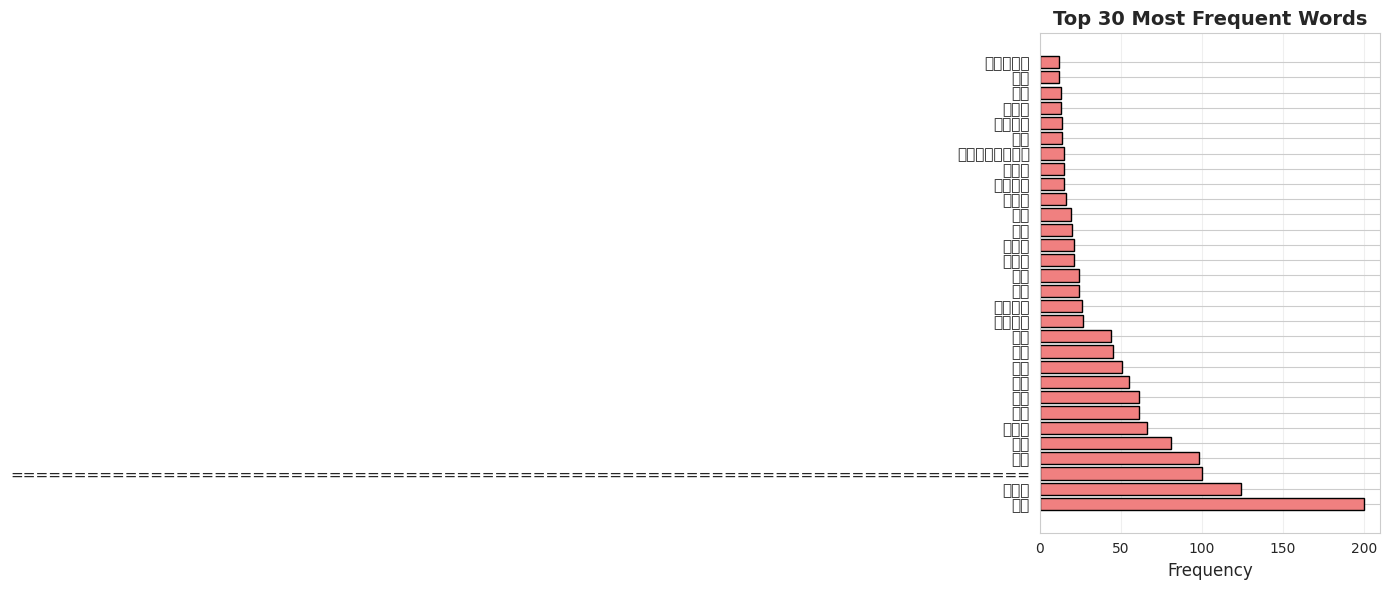

✅ Word frequency plot saved


In [18]:
# Word frequency
all_words = [word for text in train_texts for word in text.split()]
word_counter = Counter(all_words)

# Top words
top_words = word_counter.most_common(30)
words, word_counts = zip(*top_words)

plt.figure(figsize=(14, 6))
plt.barh(range(len(words)), word_counts, color='lightcoral', edgecolor='black')
plt.yticks(range(len(words)), words, fontsize=11)
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 30 Most Frequent Words', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(os.path.join(project_root,'figures/word_frequency.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Word frequency plot saved")

## 6. Morphological Complexity Analysis

/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_564216/26305390.py:15: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

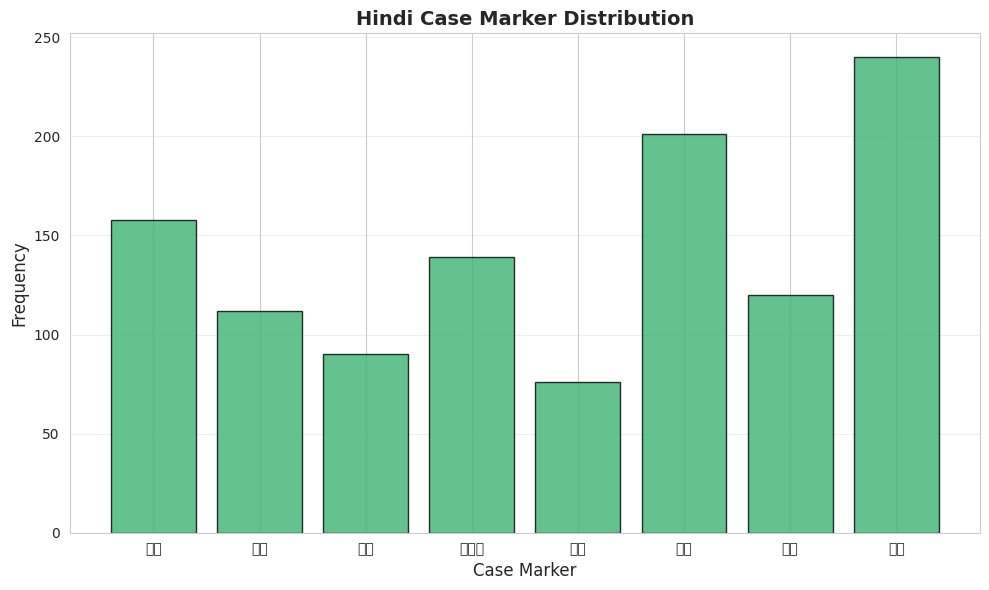


📊 Case Marker Statistics:
  के: 240 occurrences
  का: 201 occurrences
  ने: 158 occurrences
  में: 139 occurrences
  की: 120 occurrences
  को: 112 occurrences
  से: 90 occurrences
  पर: 76 occurrences


In [19]:
# Analyze morphological markers
case_markers = ['ने', 'को', 'से', 'में', 'पर', 'का', 'की', 'के']
marker_counts = {marker: sum(text.count(marker) for text in train_texts) 
                 for marker in case_markers}

plt.figure(figsize=(10, 6))
markers = list(marker_counts.keys())
counts = list(marker_counts.values())

plt.bar(markers, counts, color='mediumseagreen', edgecolor='black', alpha=0.8)
plt.xlabel('Case Marker', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Hindi Case Marker Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(project_root,'figures/case_markers.png'), dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Case Marker Statistics:")
for marker, count in sorted(marker_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {marker}: {count:,} occurrences")

## 7. Data Quality Assessment

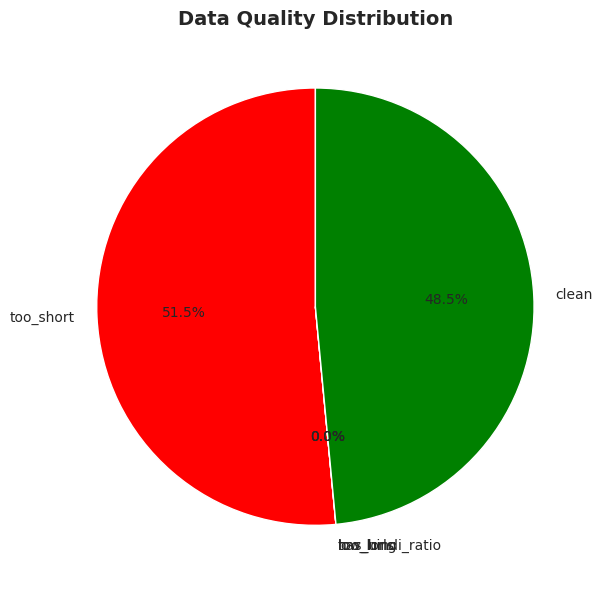


📊 Data Quality Assessment:
  too_short: 103 (51.50%)
  too_long: 0 (0.00%)
  low_hindi_ratio: 0 (0.00%)
  has_urls: 0 (0.00%)
  clean: 97 (48.50%)


In [20]:
# Assess data quality
def assess_quality(texts):
    """Assess corpus quality"""
    quality_stats = {
        'too_short': 0,
        'too_long': 0,
        'low_hindi_ratio': 0,
        'has_urls': 0,
        'clean': 0
    }
    
    for text in texts:
        word_count = len(text.split())
        
        # Check length
        if word_count < 5:
            quality_stats['too_short'] += 1
            continue
        if word_count > 200:
            quality_stats['too_long'] += 1
            continue
        
        # Check Hindi ratio
        devanagari = sum(1 for c in text if '\u0900' <= c <= '\u097F')
        hindi_ratio = devanagari / len(text) if text else 0
        
        if hindi_ratio < 0.7:
            quality_stats['low_hindi_ratio'] += 1
            continue
        
        # Check for URLs
        if 'http' in text or 'www' in text:
            quality_stats['has_urls'] += 1
            continue
        
        quality_stats['clean'] += 1
    
    return quality_stats

quality_stats = assess_quality(train_texts)

# Plot quality distribution
plt.figure(figsize=(10, 6))
labels = list(quality_stats.keys())
values = list(quality_stats.values())
colors = ['red', 'orange', 'yellow', 'pink', 'green']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Data Quality Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(project_root,'figures/data_quality.png'), dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Data Quality Assessment:")
total = sum(quality_stats.values())
for category, count in quality_stats.items():
    pct = (count / total) * 100
    print(f"  {category}: {count:,} ({pct:.2f}%)")

## 8. Export Summary Statistics

In [23]:
# Create comprehensive summary
summary = {
    'dataset_statistics': train_stats,
    'quality_assessment': quality_stats,
    'case_markers': marker_counts,
    'top_words': dict(top_words[:50]),
}

# Save to JSON
with open(os.path.join(project_root,'data/raw/hi-1_statistics.json'), 'w', encoding='utf-8') as f:
    json.dump(summary, f, ensure_ascii=False, indent=2)

print("\n✅ Summary statistics saved to data/corpus_statistics.json")


✅ Summary statistics saved to data/corpus_statistics.json


## Summary

This notebook analyzed:
- ✅ Corpus size and statistics
- ✅ Length distributions
- ✅ Character and word frequencies
- ✅ Morphological markers
- ✅ Data quality

All figures saved to `figures/` directory for thesis use.